In [1]:
import warnings

warnings.filterwarnings('ignore')

# Katalog Perpustakaan Digital ITB

Revisi: 12:30 AM UTC+7, 21 Mei 2021

## Pendahuluan

### Edisi pertama

Salah satu program kerja di divisi Penelitian HIMATIKA ITB 2019/2020 adalah "Lex Luthor's Database". Secara sederhana, proker ini bertugas untuk mencatat segala hal (baik kondisi internal maupun eksternal himpuunan) ke sebuah database. Dengan adanya database ini, diharapkan anggota himpunan (termasuk badan pengurus himpunan) dapat menerapkan kebijakan yang berbasis data.

Satu hal yang termasuk dalam proses pencatatan data ini adalah data mengenai Tugas Akhir mahasiswa matematika. Sampai saat saya menulis ini, hanya ada dua cara untuk mengetahui data TA ini. Pertama, dengan datang langsung ke Perpustakaan Program Studi Matematika, dan menggunakan fasilitas komputer disana, atau dengan mengakses website Digital Library ITB. Namun kedua cara ini memiliki kekurangan yang jelas:

Anda perlu datang ke perpus hanya untuk mencari data TA.
Fasilitas "Pencarian Lanjut" di website Digital Library yang rusak. Keadaan inilah yang mendasari mengapa data Tugas Akhir perlu disimpan ke sebuah database. [Walau ini hanya separuh dari cerita sebenarnya]
Ditugaskan untuk melakukan pendataan ini, saya mencoba berdiskusi mengenai sharing data TA dari pihak perpustakaan prodi. Namun karena hal ini mengalami kegagalan, saya memutuskan untuk melakukan scrapping website Digital Library.

### Perubahan saat ini
Tulisan ini adalah versi ketiga. Selain penambahan jumlah dokumen yang tersimpan dalam katalog, versi ini memberikan penjelasan yang lebih deskriptif pada tahapan-tahapan kegiatan. Berkas Jupyter dan data katalog yang dibuat (dan digunakan) dalam tulisan ini dapat diakses di [halaman Github ini](https://github.com/kekavigi/eksperimen/tree/master/download%20digilib/v3.1).

## Pengambilan data
Jika kita melihat katalog di Perpustakaan Digital ITB, semua informasi dokumen disusun berdasarkan sebuah angka *identifier* yang unik. Sebagai contoh, *identifier* 54675 akan merujuk pada halaman yang berisi informasi [sebuah tesis yang dibuat oleh Dwi Lerian Friatnasary](https://digilib.itb.ac.id/index.php/gdl/view/54675/) . Menariknya lagi, identifier pada katalog disusun secara menaik dari [angka 1](https://digilib.itb.ac.id/index.php/gdl/view/1).

Dari fakta ini, kita dapat melakukan hal yang dikenal dengan nama [*web scrapping*](https://en.wikipedia.org/wiki/Web_scraping). Kita cukup mengunjungi satu-per-satu halaman dari identifier 1 sampai halaman-dokumen-yang-paling-baru; dan untuk setiap kunjungan, kita tinggal mengambil informasi-informasi yang penting. Sebenarnya, itulah hal yang saya lakukan pada versi pertama tulisan ini. Malangnya, cara tersebut perlu mengunjungi 54000+ halaman: membuatnya memerlukan waktu yang sangat lama, dan juga merugikan server situs perpustakaan.

Untungnya, pihak perpustakaan menyediakan fitur [OAI-PMH](https://en.wikipedia.org/w/index.php?title=Open_Archives_Initiative_Protocol_for_Metadata_Harvesting&oldid=1007458904). Hal ini memungkinkan kita untuk dengan mudah mengambil data katalog dalam format yang terstruktur (XML) dan ukuran data yang lebih kecil, ketimbang ketika berurusan dengan berkas HTML. Sebagai contoh, silahkan lihat [tampilan OAI-PMH untuk *identifier* 54675](https://digilib.itb.ac.id/oai.php?verb=GetRecord&identifier=54675&metadataPrefix=oai_dc). Namun di sisi lain, tidak semua informasi di versi kunjungan situs juga ada di versi OAI-PMH. Contohnya adalah informasi mengenai `Staf Input/Edit` dan `File`. Menimbang lebih banyak keuntungan yang didapatkan, saya memilih menggunakan OAI-PMH untuk mengambil data katalog perpustakaan.

### Persiapan

In [2]:
# module yang kita butuhkan:

# Untuk mengakses halaman di internet
from urllib.request import urlopen
# Untuk mengubah data XML ke tipe data dict-nya Python
from xmltodict import parse
# Sebagai cache jika terjadi error dalam proses download
import pickle
# Mempermudah proses export berkas
import pandas as pd
# opsional: untuk melihat progress proses
from tqdm import tqdm

Selanjutnya, ada baiknya kita menyimpan alamat OAI-PMH dan informasi (yang tersimpan dalam bentuk tag XML) apa saja yang akan kita ambil.

In [3]:
URL   = 'https://digilib.itb.ac.id/oai-ristek.php?' \
        'verb=GetRecord&identifier={}&metadataPrefix=oai_dc'

items = ['dc:title', 'dc:creator', 'dc:contributor', 'dc:nidn', 'dc:subject', 'dc:date',
         'dc:language', 'dc:type', 'dc:Keyword', 'dc:Institution', 'dc:description']

Lalu, membuat fungsi untuk mengubah data OAI-PMH menjadi tipe data `dict`.

In [4]:
def dictify(identifier):
    result = {}
    
    # mengakses alamat OAI-PMH
    with urlopen(URL.format(identifier)) as f:
        # membaca data ke format UTF-8
        raw = f.read().decode('utf8', 'ignore')
    
    # menelurusi letak tag-tag XML yang diinginkan
    data = parse(raw)['OAI-PMH']['GetRecord']['record']['metadata']['oai_dc:dc']

    # mengolah data...
    for i in items: result[i] = data[i]
    return result

In [5]:
# output dari fungsi
dictify(54675)

{'dc:title': 'KAJIAN PERKEMBANGAN DAN APLIKASI BIOREAKTOR MEMBRAN AERASI',
 'dc:creator': 'Lerian Friatnasary, Dwi',
 'dc:contributor': 'Prof. Ir. I Gede Wenten, M.Sc., Ph.D.;Dr. Khoiruddin, S.T., M.T.;',
 'dc:nidn': None,
 'dc:subject': 'FTI - Teknik Kimia',
 'dc:date': '2021-04-30 10:33:01',
 'dc:language': 'Indonesia',
 'dc:type': 'Thesis',
 'dc:Keyword': ': aerasi, air limbah, biofilm, membran, pengolahan air, polutan.',
 'dc:Institution': 'INSTITUTE TEKNOLOGI BANDUNG',
 'dc:description': 'KAJIAN PERKEMBAGAN DAN APLIKASI BIOREAKTOR MEMBRAN AERASI\r\nOleh\r\nDwi Lerian Friatnasary\r\nNIM: 23018009\r\n(Program Studi Magister Teknik Kimia)\r\nBioreaktor membran aerasi (BRMA) merupakan teknologi inovatif untuk menangani permasalahan yang terdapat pada proses pengolahan air limbah konvensional menggunakan lumpur aktif, seperti tingkat penyisihan nutrien dan polutan yang rendah, pembentukan busa, dan ketidakstabilan biologis. Namun dalam pengoperasiannya, BRMA masih mengalami kendala, ya

### Mengunduh katalog
Saat ini, ada 54676 data buku yang tersimpan di katalog perpustakaan. Dalam keadaan seperti ini, ada baiknya proses mengunduh dilakukan secara berkelompok. Maksudnya, kita mengunduh 1000 data, lalu menyimpannya sebagai berkas sementara di komputer, dan mengunduh 1000 data selanjutnya. Di akhir proses, kita cukup menggabungkan semua berkas sementara menjadi satu berkas (data katalog) yang utuh. Metode ini menguntungkan karena jika ada error dalam proses mengunduh, kita tidak kehilangan semua data yang sudah diproses. Lagipula, cara ini tidak memerlukan banyak memori (RAM) komputer, dan prosesnya dapat ditunda jika koneksi internet sedang jelek.

Walaupun saya memiliki katalog hasil unduhan versi pertama dan kedua, saya melihat beberapa [banyak] informasi katalog perpustakaan telah diperbarui/diganti. Sebagai contoh, informasi yang sebelumnya tersimpan pada *identifier* 47451 telah diganti menjadi ke nomor [50125](https://digilib.itb.ac.id/index.php/gdl/view/50125/). Menimbang perubahan-perubahan pada data lama, ada baiknya saya kembali mengunduh katalog perpustakaan dari awal lagi.

In [6]:
# proses ini butuh 202m 31s
# batch_download(33501, 54700)

### Menyimpan hasil

Selanjutnya, kita dapat menggabungkan berkas-berkas pickle ke dalam beberapa format. Dalam kegiatan ini, saya memilih format TSV (Tab Separated Value) untuk menyimpan katalog mentah, sekaligus mempermudah orang lain jika ingin menggunakan data katalog ini.

## Merapikan data

In [7]:
import pandas as pd

# baca TSV
katalog = pd.read_csv("katalog.tsv", sep="\t")

Seperti banyak data yang didapatkan langsung dari lingkungan, banyak informasi dalam katalog yang tidak rapi. Untuk itu, ada baiknya kita melihat dan mencoba memahami data yang kita dapatkan, sekaligus mencatat perapian yang dilakukan -- yang mungkin dapat menimbulkan bias dalam analisis.

Pertama, mari kita lihat bagaimana sebaran data NA (*Not Available*, Tidak Tersedia) pada data katalog.

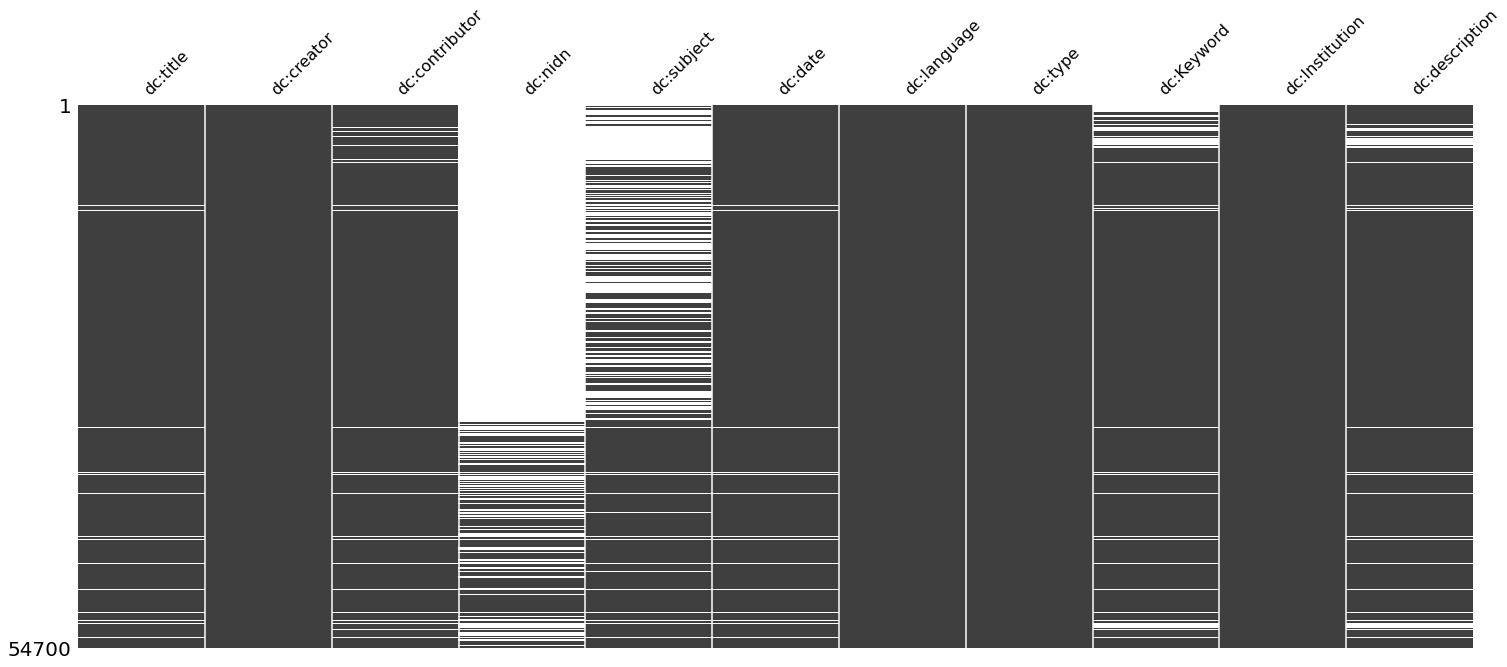

In [8]:
import missingno as msno

msno.matrix(katalog, sparkline=False);

Dari melihat sekilas, kita melihat bahwa data NIM tidak pernah diikutkan lagi (setidaknya pada kolom `creator`) sejak kolom `nidn` mulai aktif diisi. Selain itu, kita melihat kolom ini juga mengakibatkan peningkatan keterisian kolom `subjek`.

Dari grafik tersebut, kita melihat ada baris yang semua datanya kosong (ditandai oleh garis putih). Baris-baris ini berhubungan dengan dokumen yang ditarik dari katalog, atau akibat nomor *identifier* yang dokumen yang diubah (ingat bahwa nomor *identifier* nilainya selalu meningkat). Selanjutnya, ada baiknya baris-baris kosong ini tidak diikutkan dalam eksperimen.

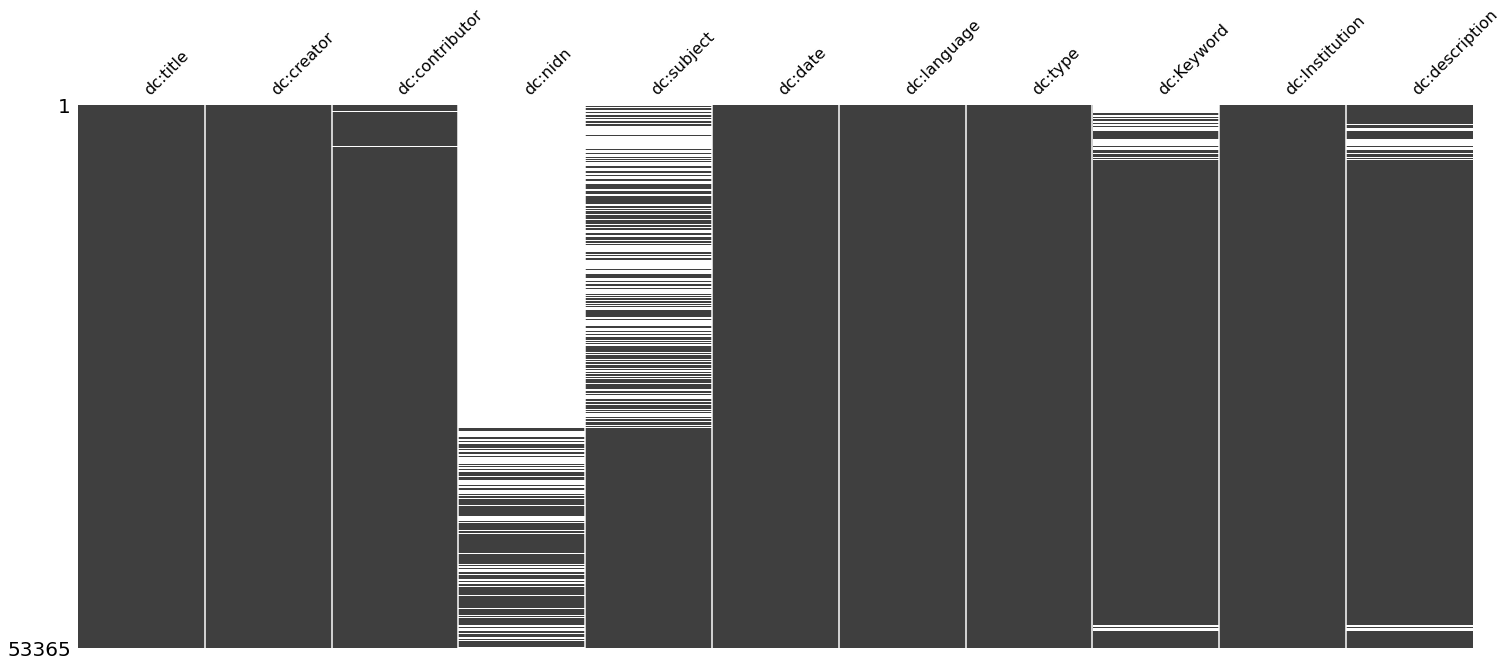

In [9]:
# kolom `title` yang kosong sebagai acuan data yang telah dihapus
katalog = katalog[katalog['dc:title'].notnull()]

msno.matrix(katalog, sparkline=False);

In [10]:
# karena selanjutnya kita akan banyak berurusan dengan string,
# ada baiknya nilai NA dinyatakan sebagai string kosong (untuk
# menghindari peluang error yang sulit dicari)
katalog.fillna('', inplace=True)

In [11]:
katalog.sample(3)

,dc:title,dc:creator,dc:contributor,dc:nidn,dc:subject,dc:date,dc:language,dc:type,dc:Keyword,dc:Institution,dc:description
48543,PENGEMBANGAN SISTEM NAVIGASI DALAM RUANGAN BER...,"Baptista Wijaya B, Yohanes","Drs. Maman Budiman, M.Eng., Ph.D.;Dr. Nina Sit...",0025096601;0415048303,FMIPA - Fisika,2020-06-29 21:00:07,Indonesia,Thesis,"Dijkstra, Fingerprint, k-Nearest-Neighbor, MQT...",INSTITUTE TEKNOLOGI BANDUNG,Teknologi penentuan posisi untuk navigasi kend...
43523,ALGORITMA TRIANGLE COUNTING DENGAN MENGGUNAKA...,"Novanto, Dicky","Achmad Imam Kistijantoro, S.T., M.Sc., Ph.D.;",0009087301,STEI - Teknik Informatika,2019-09-27 11:12:43,Indonesia,Thesis,"partisi, HDRF, triangle counting, Spark",INSTITUTE TEKNOLOGI BANDUNG,Algoritma triangle counting adalah salah satu ...
51350,REDESAIN INSTALASI PENGOLAHAN LUMPUR TINJA DUR...,"Moses Satria, Sena","Dr.-Ing. Marisa Handajani, S.T., M.T.;Dr. Dyah...",0015077202;0020078604,FTSL - Rekayasa Infrastruktur Lingkungan,2020-09-28 12:41:44,Indonesia,Thesis,"Jakarta Sewerage System, IPLT Duri Kosambi, IP...",INSTITUTE TEKNOLOGI BANDUNG,Jakarta Sewerage System adalah sebuah proyek i...


Ada baiknya kita menghapus dc: dari setiap nama kolom agar lebih intuitif.

In [12]:
new_name = {x:x[3:] for x in katalog}
katalog = katalog.rename(columns=new_name)

### Tipe data ordinal

Terlihat ada beberapa kolom di katalog dengan tipe data ordinal/kelompok, ada baiknya kita mengecek apakah ada pengelompokan yang kurang wajar.

#### Kolom `language`, `type`, dan `institution`

In [13]:
print(set(katalog['language']))
print(set(katalog['type']))
print(set(katalog['Institution']))

{'Indonesia'}
{'Thesis'}
{'INSTITUTE TEKNOLOGI BANDUNG'}


Karena kolom language, type, dan Institution masing-masing hanya memiliki satu nilai, kita dapat dengan aman membuangnya.

In [14]:
katalog.drop(columns=['language', 'type', 'Institution'], inplace=True)

#### Kolom `subject`

Kita juga dapat melakukan hal yang sama untuk kolom `subject`. Melihat hasil dari `set(katalog['subject'])`, saya memutuskan untuk menggabungkan/mengganti beberapa nama berikut

In [15]:
new_name = {
    'Biologi': 'SITH - Biologi',
    'Farmasi': 'SF - Farmasi',
    'FITB - Teknik geologi': 'FITB - Teknik Geologi',
    'FSRD- Desain': 'FSRD - Desain',
    'FTTM - Teknik Metalurgi - S1': 'FTTM - Teknik Metalurgi S1',
    'Geofisaka Terapan': '? - Geofisika Terapan',
    'Magister Bisnis dan Administrasi - Teknologi': 'SBM - Bisnis dan Administrasi Teknologi',
    'Oseanografi': 'FITB - Oseanografi',
    'Sekolah Bisnis dan Manajemen': 'SBM - SBM',
    'Sekolah Ilmu dan Teknologi Hayati': 'SITH - SITH',
    'Teknik Geofisika - FTTM': 'FTTM - Teknik Geofisika',
    'Teknik Kelautan': 'FTSL - Teknik Kelautan',
    'Teknik Lingkungan': 'FTSL - Teknik Lingkungan',
    'Teknik Perkeretaapian': '? - Teknik Perkeretaapian',
    'Teknik Sipil': 'FTSL - Teknik Sipil',
    'Teknik Sains': '? - Teknik Sains'
}

f = lambda val: new_name[val] if val in new_name else val
katalog['subject'] = katalog['subject'].apply(f)

Malahan, mari kita pisahkan kolom `subject` menjadi dua kolom baru: `group` yang berisi nama fakultas atau sejenisnya, dan `program` yang berisi nama program-program studi atau sejenisnya.

In [16]:
f = lambda val: val.split(' - ')[0] if ' - ' in val else val
katalog['group'] = katalog['subject'].apply(f)

f = lambda val: val.split(' - ')[1] if ' - ' in val else ''
katalog['program'] = katalog['subject'].apply(f)

del katalog['subject']

### Teks bebas

Melihat banyak kolom yang berisi teks yang dapat diisi dengan bebas, ada baiknya kita mengecek apakah data yang tidak wajar di dalam kolom-kolom tersebut. Hal tersebut dapat berupa:
* ukuran yang tidak wajar, seperti terlalu pendek (contoh: kolom description yang hanya berisi huruf "a").
* penanda data yang tidak terdefinisi, seperti "-", "undefined", "no abstract", dan sejenisnya.
* adanya data yang tidak seharusnya (contoh, tambahan data NIM pada kolom creator, atau tag HTML yang masih terikut).
* data yang jelas rusak.

#### Perapian awal

In [17]:
import re

def cleaned(col_name, threshold):
    # hapus data dengan panjang yang tidak lebih
    # panjang daripada nilai threshold
    f = lambda val: val if len(val)>threshold else ''
    katalog[col_name] = katalog[col_name].apply(f)
    
    # hapus tag HTML yang ada di data
    f = lambda val: re.sub('<[^<]+?>', '', val)
    katalog[col_name] = katalog[col_name].apply(f)
    
    # menghapus spasi ganda, dan garis-baru (newline)
    f = lambda val: re.sub('[ \r\n]+', ' ', val)
    katalog[col_name] = katalog[col_name].apply(f)

In [18]:
%%time

cleaned('title', 2)
cleaned('creator', 4)
cleaned('contributor', 4)
cleaned('Keyword', 2)
cleaned('program', 0)
cleaned('description', 13)

CPU times: user 18.8 s, sys: 182 ms, total: 19 s
Wall time: 19.7 s


#### Kolom `description`
Alasan:
* Menyatukan teks-yang-mensyaratkan-data-NA agar sedikit waras

Tindakan:
* Satukan datanya.

Cara:
* 300 karakter harusnya cukup untuk menulis NA.
* Gunakan fuzzy search untuk mengelompokkan NA.
* ganti daftar teks yang didapat dengan empty string.

In [19]:
from fuzzywuzzy import fuzz

In [20]:
desc = katalog['description']

# fokus ke teks dengan panjang kurang dari 300 karakter
tmp = desc[desc.str.len() < 300].to_list()
# fokus pada daftar teks yang unik
tmp = list(set(tmp))

In [21]:
%%time

group = []

def grouper():
    # menggabungkan beberapa teks yang "sama"
    # ke dalam satu kelompok
    text = tmp.pop()
    group.append([text])
    
    for other_text in tmp:
        # teks dianggap sama jika rasionya > 85
        if fuzz.ratio(text, other_text)>85:
            group[-1].append(other_text)
            tmp.remove(other_text)

# lakukan sampai semua teks di tmp
# berhasil dikelompokkan
while tmp: grouper()

CPU times: user 22.4 s, sys: 41.6 ms, total: 22.5 s
Wall time: 24 s


In [22]:
na_list = {}

for g in group:
    # fokus pada group dengan anggota lebih dari satu
    if len(g)==1: continue
    
    # semua teks-mensyaratkan NA punya panjang < 70
    for text in g:
        # masukkan ke daftar
        if len(text)<70: na_list[text]=''
    
print(len(na_list))

70


In [23]:
katalog['description'] = desc.replace(na_list)

#### Kolom `contributor`

Alasan:
* Penulisan gelar yang tidak konsisten mengganggu dalam menganalisis/membuat model
* Begitu pula dengan teks non nama, seperti "Pembimbing Tugas Akhir", atau "Advisor :"

Tindakan:
* hapus penulisan gelar dan teks non-nama, sebisanya.

Cara:
1. rapikan dan hapus kerusakan-kerusakan umum
2. hapus penulisan gelar
3. perbaiki kesalahan format nama, dan kerusakan signifikan yang terlewat


In [24]:
kat_length = katalog.count()['title']
kat_length

53365

##### Kerusakan umum

In [25]:
na_list = {'-':'', 'null':'', 'tidak ada':'', '#CONTRIBUTOR#':''}
katalog['contributor'].replace(na_list, inplace=True)

In [26]:
def clean1(val):
    # karakter titik koma (;) sebagai pemisah antar nama
    
    # ===================================
    # tidak ada nama pada teks yang mengandung mahmudin@
    if 'mahmudin@' in val: return ''
    # hapus alamat email
    val = re.sub('\w.*@.*\.(id|com)', '', val)
    # hapus karakter-karakter berikut
    val = re.sub('&#\d+\;', '', val)
    val = re.sub('(Ã(‚|ƒ)Â|ƒÃ‚)','', val)
    val = re.sub('(<br|br>)', '', val)
    
    # ===================================
    # nama orang yang menge-scan dokumen
    val = re.sub('scan(ner){,1}[ :]*.*', ' ', val, flags=re.I)
    val = re.sub('(Ena Sukmana|editor| oleh |unggah pertama pada)', ' ', val, flags=re.I)
    # teks non-nama seperti "Dosen Pembimbung I:", "Advisor 1 :", dan sejenisnya
    # anggap teks ini sebagai pemisah antar nama
    val = re.sub('(dosen){,1}( ){,3}(pe.{4,8}ng|advisor|akademik)( )*(utama|tesis|pertama|kedua|proyek akhir|tugas akhir|I{,3}|\d)( )*(:){,1}', ' ; ', val, flags=re.I)
    val = re.sub('(|ko-|co-)(supervisor|promotor|penulis|pembina|author(s){,1})[ I\d]*?:', ' ; ', val, flags=re.I)
    val = re.sub('Koordinator (Kelompok|Tugas Akhir|TA Desain Produk)', ' ; ', val, flags=re.I)
    val = re.sub('Ketua( Program Studi){,1}',' ; ', val, flags=re.I)

    # ===================================
    # hilangkan gelar yang sering dijumpai + tidak konsisten
    # anggap teks ini sebagai pemisah antar nama
    val = re.sub('Dr(a|s){,1}.*?(nat|pol|tech(n){,1})( |\.)', ' ; ', val, flags=re.I)
    val = re.sub('Dr(a|s){,1}.{,3}(ing|eng|ir)( |\.)', ' ; ', val, flags=re.I)
    val = re.sub('Dr(a|s){,1}\.', ' ; ', val, flags=re.I)
    val = re.sub('Ph( |\.|\. )D( |\.)', ' ; ', val, flags=re.I)
    val = re.sub('PhD( |\.)', ' ; ', val, flags=re.I)
    val = re.sub('((P|p)rof|Ir)\.', ' ; ', val)
    val = re.sub('M( |\.|\. )B( |\.|\. )A( |\.|\. )', ' ; ', val)
    val = re.sub('MBA', ' ; ', val)

    # ===================================
    # anggap teks ini sebagai pemisah antar nama
    val = re.sub('[\,\(\)\:•‡†§><&#]', ' ; ', val)
    val = re.sub('\d+', ' ; ', val)
    # rapikan spasi berlebih
    val = re.sub('\s+', ' ', val)
    # sederhanakan pemisah antar nama, (; ; ;) menjadi (;) saja
    val = re.sub(';( ;)+', ';', val)
    # sederhanakan penulisan titik ganda
    val = re.sub('\.(( )*\.)+', '', val)
    if val and val[0]=='.': val = val[1:]

    return val.strip()

In [27]:
katalog['contributor'] = katalog['contributor'].apply(clean1)
tmp = katalog['contributor'].value_counts().to_dict()

# persentase teks unik
print(100 * len(tmp)/kat_length)

43.09753583809613


##### Menghapus gelar

In [28]:
# daftar gelar, lupa ngambil dari mana, sebagian dari feedback-loop output kodingan
gelar = {'Prof', 'M Des', 'M Sc', 'M Sc.', 'M Sn.', 'M-Eng', 'M. D.', 'M. Ds', 'M. E', 'M. E.', 'M. Ec', 'M. Ed', 'M. H', 'M. IP', 'M. LA', 'M. M.', 'M. Mo', 'M. S.', 'M. SA', 'M. Sc', 'M. Si', 'M. Sn', 'M. T', 'M. T.', 'M. UP', 'M. s', 'M. s.', 'M. sc', 'M. si', 'Sp.B', 'Sp.F.', 'Sp.FK', 'Sp.JP', 'Sp.KJ', 'Sp.M.', 'Sp.P', 'Sp.P.', 'Sp.PK', 'Sp.S', 'Sp.S.', 'SpFK', 'SpJP', 'SpJp', 'SpKFR', 'SpKJ', 'SpPD', 'SpPD.', 'SpPK', 'SpPK.', 'MSc..', 'MSc.Apt.', 'MSc.CE.', 'MSc.EE', 'MScE.', 'MScEE.', 'MScI', 'MSi.', 'MSn.', 'M.S.E.', 'Apt.', 'M.Eng.', 'MAUD', 'MUDD', 'ST. MT.' 'MS', 'M.Sc.', 'DEA', 'A.Ma.Pd', 'S.P', 'M.Kor.', 'M.H.', 'S.Kel.', 'B.Sc', 'M.Hum', 'M.P.H', 'M.Ked.Trop.', 'M.P.I.', 'M.E.I.', 'Dra', 'S.Si', 'M.Kes.', 'B.Eng', 'S.Sos', 'Mbus', 'M.Han.', 'M.AP.', 'M.T.', 'M.I.Kom.', 'S.Sn', 'S.Kep.', 'M.T.A', 'M.Ed', 'S.Sn.', 'S.T', 'M.Fhil.', 'S.Ars', 'B.E', 'M.A.Ked.', 'S.Pd.SD', 'MA.', 'M.Arch', 'L.L.B', 'M.Mgt', 'S.Farm', 'S.Pd.SD.', 'M.I.Pol.', 'S.IKom', 'S.S.T', 'MSEE.', 'S.P.', 'M.A.Pd.', 'M.Lib', 'M.Sc', 'S.H.I', 'S.SI.', 'M.Farm.Klin.', 'M.Hut.', 'S.Kom.', 'S.I.P.', 'M.H.Kes.', 'M.P.Kim.', 'A.P.Kom.', 'A.Md.Pd.', 'MMSI', 'M.K.K.', 'S.Kom', 'A.Md.K.G.', 'M.Li.', 'MMSI.', 'S.Gz.', 'MKKK', 'D.P.H', 'S.E', 'A.Md.Bid.', 'S.H.', 'S.Hum', 'M.A.Hum.', 'S.H', 'M.Pd', 'M.Ds.', 'M.F', 'M.P.Kim', 'M.P.H.', 'S.Pd.I.', 'B.Ag', 'M.Sos.I.', 'MComm', 'S.Hut.', 'M.Min', 'S.Ked', 'S.Fhil', 'A.Ma.Pust.', 'S.Mn', 'M.P', 'MSIE', 'Dr.H.C', 'S.Th.I.', 'M.M.', 'M.Ak.', 'M.Comp.Sc', 'S.Pt.', 'S.Pd', 'A.Md.Far.', 'D.M.D', 'M.Hum.', 'MSA', 'A.Md.Par', 'Th.M', 'SKG.', 'S.Psi.', 'M.A.R.S.', 'S.T.P.', 'M.B.A', 'S.Pd.I', 'S.Pi.', 'S.T.', 'M.Kesja', 'S.Sos.I', 'S.AP.', 'A.P', 'M.Eng', 'M.Mar', 'S.Pt', 'S.S.', 'B.Bus', 'A.Ma.', 'M.App.Sc', 'Th.D', 'M.R.E', 'S.E.', 'M.Kes', 'S.Ag.', 'M.Fil.I.', 'M.F.A', 'S.Kel', 'S.Kep', 'Dra.', 'M.Litt', 'M.Si', 'M.Psi.', 'Drs', 'M.Stat.', 'M.Nurs', 'M.Sn.', 'S.Fhil.', 'S.K.M', 'SEi', 'M.Tr.', 'S.I.Kom.', 'MSIE.', 'S.Kes', 'B.D', 'M.Kom', 'B.Com', 'M.Mus', 'B.Arch', 'MKK', 'A.Md.Kom.', 'M.Pd.I.', 'S.Psi', 'M.Si.', 'S.Pi', 'M.Ag', 'M. Kn', 'MMR', 'S.E.I.', 'M.Agri.', 'Ed.D', 'B.Litt', 'M.Farm.', 'S.In', 'D.Sc', 'A.Md.Par.', 'S.Ag', 'S.Pd.', 'A.P.Par.', 'M.Ars.', 'Ir.', 'S.Apt', 'S.Th.I', 'S.Agr.', 'S.Ked.', 'M.MPd.', 'S.K.M.', 'A.Md.Kes.', 'M.Biomed.', 'M.Epid.', 'Pharm.D', 'J.S.D', 'BIE', 'B.A', 'M.S.I.', 'S.si', 'M.Tr.Hanla.', 'M.Ked', 'Bc,Kn', 'S.IP.', 'M.P.Mat.', 'S.Kar', 'Mcom', 'M.E.Sy.', 'M.A.', 'S.S', 'A.Md.Bid', 'M.Phil', 'S. AB.', 'A.Ma.Pd.', 'M.S', 'S.I.P', 'MARS', 'A.Md.Per.', 'MSA.', 'S.Th.K', 'Dr.', 'M.Sn', 'S.Ners', 'S.Sy.', 'A.Md.Keb.', 'S.Hut', 'DBA', 'A.Md.Kes', 'M.Th', 'M.M', 'S.KG', 'A.Md.Per', 'M.T', 'Ir', 'S.H.I.', 'M.H.I.', 'BBA', 'D.Econ', 'Dr', 'S.Sos.', 'M.Div.', 'A.Md.Ak.', 'L.L.M', 'M.AB.', 'M.Eng.Sc', 'A.P.', 'S.Ds', 'B.M', 'D.L.S', 'M.S.M.', 'S.STP.', 'M.A', 'M.Kn.', 'M.Si.Han', 'Drs.', 'S.Si.', 'M.TI.', 'S.Gz', 'A.Md', 'S.TP', 'A.Md.', 'S.KH', 'M.Keb.', 'M.Kom.', 'S. Farm.', 'M.Kesos.', 'M.Econ.', 'S.Fil.I', 'A.Ma', 'M.P.', 'M.Ag.', 'D.Comm', 'A', 'M.Cs.', 'Dipl. Ing', 'M.Pd.', 'Ph.D', 'D.Eng', 'M.Econ'}
gelar = gelar.union({'-Ing','D. B. A.','DR rer nat','Dip. Geol', 'Dipl', 'Dipl Geothermal Tech', 'Dipl H. E.', 'Dipl-Geol', 'DiplGeologi','Dosen', 'F. Ms', 'I. P. M.', 'IPU','Ko-','M. A. Sc','M. Agr.','M. App. Sc.','M. Eng.ugraha', 'M. EngSc.', 'M. Env.Eng.Sc.','M. Hum.',  'M. OcE. Anggota', 'M. P. P.', 'M. Pd.', 'M. Psi.',  'M. S. Dipl Eng.', 'M. SCE.', 'M. SP.',  'M. Se.', 'M. Si.M. Sc',  'M. eng', 'M. sc.', 'M. si.', 'MA. Sc.', 'MLA iv',  'MSc. Co.', 'MSc. P. hD', 'MT. Co.',  'MT. Ph.D', 'NIM',  'P. hD.', 'P. hd.',  'P. hD.', 'P. hd.', 'PD. Eng.', 'PD. Eng.',  'Program', 'Promotor',  'S. Si.', 'S. T',  'S. T. M. eng', 'ST. MSc', 'd.Sc.', 'APU.', 'CES.', 'Pof.', 'ENG.', 'SSn.', 'Dip.', 'B. E.', 'FGS.', 'FIHT.', 'FICE.', 'DESS.', 'BEM.', 'CEng.', 'PROF.', 'DEV.', 'E. E.', 'N. S.', 'H. K.', 'Alm.', 'Ing-.', 'Psi.', 'SSi.', 'BEng.', 'NIP.', 'H. P.', 'IPM.', 'A. N.', 'APT.', "P'Hd.", 'ST. .', 'Pro.', 'Onk.', 'CMA.', 'm.sc.', 'DBA.', 'KIC.', 'Lic.', 'SApt.', 'CBAP.', 'SST.', 'Ris.','mun', 'mktg', 'msc', 'm.sc.','M Sc', 'METE', 'MSME.', 'MPhil', 'MIHT.', 'MTD.', 'MCIT.', 'MCRP.', 'MS. c', 'MPH.', 'MEIE', 'MSOE.', 'Msc.E', 'MSOR.', 'MEng.', 'M. PL', 'MURP.', 'M Sc.', 'MFA.', 'Met.E', 'MBus.', 'Msi.', 'MSi.', 'MURP', 'Msn.', 'Macc', 'MAcct', 'MDsg.', 'MSn.', 'M Des', 'Mktng', 'M. sn', 'MAUD.', 'MIHT', 'MICE', 'MEIE.', 'MNRM', 'MHIT', 'MCP', 'MEIN.', 'Msp', 'MITE', 'MGE.', 'MT. P', 'MASC.', 'MTCP.', 'MAsc', 'MSEE', 'MComm', 'MCIPS', 'MBCS', 'MAcc.', 'MsEB.', 'MSTR.', 'MS-AA', 'Mast', 'MSC.', 'MPI.', 'Mbuss', 'MOcE', 'MPl', 'MUDD', 'MPL', 'MMIM', 'MAP', 'MSIE', 'M. UP', 'M. SC', 'MBENV', 'MBenv', 'MCTS', 'MKes', 'M. IP', 'MNA', 'Mont', 'MS Co', 'MT. .', 'Msm.', 'MaSc.', 'MSAS.', 'MKom.', 'MA]', 'M. H', 'MUR', 'MBSI', 'M. En', 'Mko', 'MLS', 'MHKE', 'MHRM', 'MMkes', 'MKM.', 'MCH', 'MDS', 'MMgt','QWP','MSEM.','M. I. P.','M. Ec. Dev.','S. A.','Dipl-Ing.','MOCE.','M. S. A. E.','M. Env.S','M. SAE.','M. Sn.', 'M. Sc.E.', 'M. Sc.Eng.', 'MPA.', 'RFA.', 'CFP.', 'Bandung', 'Perpustakaan Pusat ITBJl. Ganesha', 'Me.Eng.', 'MSD.', 'MAUD', 'M. Buss','M. Des.','M. Acc.', 'MBEnv.', 'M. GIT.', 'M. A. B.', 'Dipl Eng.', 'D. Sc.','S. SiT','M. Comp','M. Me','MIP.','M. Comp',"M. Eng'", 'MQM', 'MUP.', 'MES.', 'MSEB.', 'MIS.', 'MSAE.', 'S. Ds.', 'M. Dsg', 'M. Eng.Sc.', 'M. PI.', 'Pd.D', 'MSCE', 'MCSE', 'MSP.', 'B. HSc.', 'M. Arch', 'Apt.', 'MSAE', 'MLA.', 'Cth.', 'ITC', 'ITB', 'CYCU', 'DIC.', 'Supervisors', 'Sc. D.', 'MSME', 'FSAI.', 'FSAI', 'P. h.D.', 'DEA.', 'Dipl Geol', 'ST. MT.', 'M. A. Sc.', 'S. ST.', 'M. Sc', 'M. Sc. E', 'M. Sch', 'M. T.', 'M. Si.', 'MASc.', 'BSc.', 'Anggota', 'Tim', 'Ph.Dc', 'Ph. D', 'Bapak',  'M. SEE', 'M. Si..', 'PSG', 'Peran', 'ST. M. Sc.', 'ST. MT', 'St. MT.', 'tIM', 'tim', 'CEng'})

In [29]:
def clean2(val):
    # hapus nama gelar
    val = ' '.join([w for w in val.split() if (w not in gelar)])
    val = ';'.join([name for name in val.split(';') if (name.strip() not in gelar)])
    # anggap `dan` dan `and` sebagai pemisah nama
    # agar tidak sengaja memroses nama, ikutkan spasi
    val = re.sub(' (dan|dan ;|; dan) ', ';', val, flags=re.I)
    val = re.sub('( and ; | ; and |\?and)', ';', val, flags=re.I)
    # sederhanakan pemisah antar nama
    val = re.sub(';( ;)+', ';', val)
    if val and val[0]==';': val=val[2:]
    if val and val[-1]==';': val=val[:-2]

    return val

In [30]:
katalog['contributor'] = katalog['contributor'].apply(clean2)
tmp = katalog['contributor'].value_counts().to_dict()

# persentase teks unik
print(100 * len(tmp)/kat_length)

35.61322964489834


##### Merapikan gaya penulisan nama

In [31]:
def clean3(val):
    # ekstrak nama yang didapat hasil cleaning sebelumnya
    tmp = [w.strip() for w in val.split(';')]
    tmp1 = []
    for w in tmp:
        # hapus tanda titik jika muncul sebagai karakter pertama
        if w and w[0]=='.': w=w[1:]
        # jika ada huruf kapital diikuti tanda titik, kasih spasi
        # konstrain dibuat untuk menghindari beberapa gelar
        w = re.sub('([A-Z]\.)', '\\1 ', w)
        # jika ada nama yang diakhiri tanda titik, hilangkan tanda
        # titik. dilakukan dengan melihat apakah tanda titik
        # diawali dengan tiga karakter huruf kecil, contoh
        # "Brahmono." => "Brahmono"
        w = re.sub('([a-z]{3})\.', '\\1', w)
        # rapikan spasi ganda
        w = re.sub('( )+', ' ', w)
        w = w.strip()
        # hanya ikutkan jika di akhir proses jumlah karakter
        # non titik tidak kurang dari 3
        if len(w.replace('.',''))>=3: tmp1.append(w)

    # gabungkan semua nama kembali
    val = ' ; '.join(tmp1)
    
    return val

In [32]:
katalog['contributor'] = katalog['contributor'].apply(clean3)
tmp = katalog['contributor'].value_counts().to_dict()

# persentase teks unik
print(100 * len(tmp)/kat_length)

30.799212967300665


In [33]:
katalog['contributor'].sample(10)

22903    Ernawati Ariffin Giri-Rachman ; Wardono Nilope...
9152                                Ridho Kresna Wattimena
44436    Debbie Soefie Retnoningrum ; Aluicia Anita Art...
3121                            Yuswandi ; Sahyawidihardjo
53097                                  Yuliani Dwi Lestari
21113                     Kosasih Prijatna ; Irwan Meilano
31530                            Gunawan Handayani ; MSCE.
8779                                   Noorsalam R. Nganro
23332                                      Sudjati Archmat
24811                              Iswandi Imran ; MA. Sc.
Name: contributor, dtype: object

#### Kolom `nim`

Sepertinya sebagian data pada kolom `creator` juga mengandung data NIM (Nomor Induk Mahasiswa). Ada baiknya data ini diletakkan pada sebuah kolom baru, seperti kolom `nim`.

In [34]:
def get_nim(val):
    i = val
    # hilangkan karakter non-bilangan
    val = re.sub('\D', ' ', val)

    # hilangkan spasi berlebih
    val = re.sub('[ ]+', ' ', val).strip()
    
    # jika saat ini panjang val < 8, jelas tidak ada NIM
    if len(val)<8: return ''
    
    # kasus NIM ditulis dalam bentuk: XXX YY ZZZ
    pat = re.compile('(\d{3} \d{2} \d{3})')
    tmp = re.split(pat, val)
    if tmp[0]!=val:
        # jika ada, hilangkan spasi agar jadi XXXYYZZZ
        val = ' '.join([x.replace(' ', '') for x in tmp])

    # terakhir, hilangkan semua bilangan yang panjangnya
    # bukan 8, diasumsikan bilangan ini bukan bagian dari
    # suatu format NIM...
    val = ' ' .join([x for x in val.split() if len(x)==8])
    return val

In [35]:
katalog['nim'] = katalog['creator'].apply(get_nim)

#### Kolom `creator`

Setelah data NIM dipindahkan ke kolom baru, kita dapat menghapus NIM dari kolom `creator`. Lebih lanjut, saya memutuskan untuk juga menghapus semua kemunculan angka lebih dari satu digit.

In [36]:
def clean_creator(val):
    # contoh format yang dicari: (NIM : 123 45 678)
    val = re.sub('[\[\(].*?[\d ]+[\]\)]', '', val)
    # contoh format yang dicari: Nim : 123 45 678
    val = re.sub(' NIM.*?[\d ]+', '', val, flags=re.IGNORECASE)
    # hapus kemunculan angka yang lebih dari satu digit
    val = re.sub('\d\d+', '', val)
    
    return val

In [37]:
katalog['creator'] = katalog['creator'].apply(clean_creator)

Alasan:
* Pada dasarnya sama dengan kolom `description`
* Ada cukup banyak irisan nama yang disimpan dalam kolom `creator` dan kolom `contributor`

Tindakan:
* lakukan perapian yang sama seperti kolom `description`
* hilangkan irisan nama antara kolom `creator` dan kolom `contributor`

In [38]:
katalog['creator'].loc[14797]

'PRAYANA ARDIE PUTRA ; Pembimbing: Dr. Ir. Dermawan Wibisono, M.Eng, ALFIAN'

In [39]:
# CLEANING
clean_list = {
    'Central Library':'', 'Anonim':'', 'undefined':''
}
katalog['creator'].replace(clean_list, inplace=True)

In [40]:
def clean4(val):
    # ubah gaya penulisan nama menjadi
    # first name last name
    *last, first = val.split(',')
    val = first + ' ' + ','.join(last)
    return val

In [41]:
tmp = katalog['creator']

# lakukan cleaning, termasuk cleaning
# yang sama dengan kolom contributor
tmp = tmp.apply(clean4)
tmp = tmp.apply(clean1)
tmp = tmp.apply(clean2)
tmp = tmp.apply(clean3)

katalog['creator'] = tmp

In [42]:
def clean_creator(val):
    cr = set(val[0].split(' ; '))
    co = set(val[1].split(' ; '))
    
    if len(cr)>1: cr = cr-co
    return ' ; '.join(cr)

def clean_contributor(val):
    cr = set(val[0].split(' ; '))
    co = set(val[1].split(' ; '))
    
    return ' ; '.join(co-cr)

katalog['creator'] = katalog[['creator', 'contributor']].apply(clean_creator, axis=1)
katalog['contributor'] = katalog[['creator', 'contributor']].apply(clean_contributor, axis=1)

In [43]:
katalog[['creator', 'contributor']].sample(3)

,creator,contributor
30462,Rifani Bhakti Natari,Rahmana Emran K. ; Amir Musadad M. ; Serta
6261,Iman Hardiman,Bigman M. Hutapea ; Maulidya Indah Junica ; MSc
50471,Zalfa Fakhirah Amir Nur,Rofiq Iqbal ; Nur Novilina Arifianingsih


### Menyimpan hasil

Tentu, ada banyak perapian lain yang dapat dilakukan, misalnya mencoba mengonsistenkan format penulisan kolom `contributor`, `creator`, `title`, dan `Keyword`. Lagipula, tindakan yang kita lakukan saat ini belum menangkap semua kerusakan data yang terjadi. Walaupun demikian, saya rasa perapian-perapian ini sudah cukup untuk dapat digunakan pada tahap-tahap berikutnya.

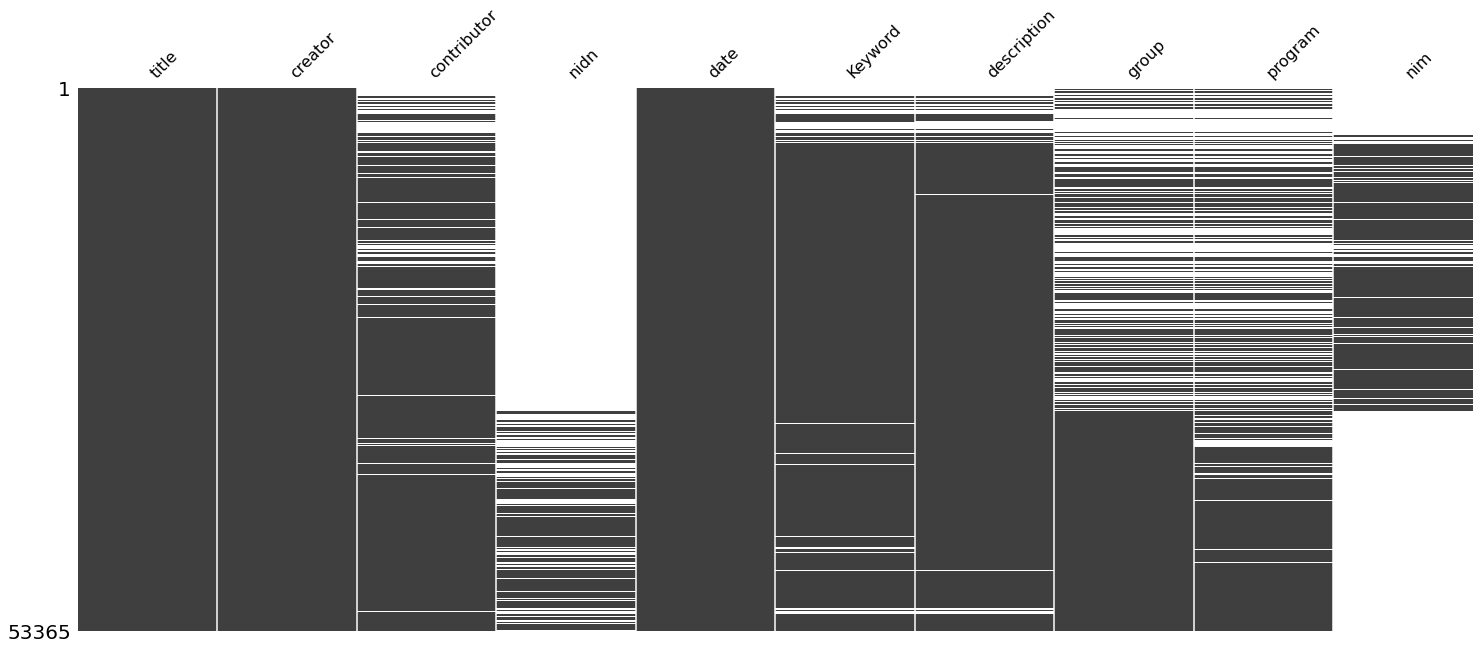

In [44]:
# mari lihat perkembangan saat ini
#   kembalikan string kosong '' menjadi NaN agar
#   dianggap sebagai data kosong oleh missingno
katalog = katalog.replace('', pd.np.nan)
msno.matrix(katalog, sparkline=False);

In [45]:
# dan simpan sebagai file baru
katalog.to_csv("katalog_cleaned.tsv", sep="\t", index=False)